**Task 3 To Perform Logistic Regression with a New Feature and Creating a Precision-Recall Curve**

In [11]:
%autosave 10
#autosaving every 10 seconds

Autosaving every 10 seconds


In [12]:
#required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
df = pd.read_csv('C:\\Users\Shiwani\Mini Project 2\Task 1\dataset\cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [16]:
x=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']

In [17]:
#training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

In [18]:
model=LogisticRegression()

In [19]:
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
#predicted probabilities of testing data
predictions=model.predict_proba(x_test)
predictions 

array([[0.58543276, 0.41456724],
       [0.53445691, 0.46554309],
       [0.88802229, 0.11197771],
       ...,
       [0.58543276, 0.41456724],
       [0.96926576, 0.03073424],
       [0.65049349, 0.34950651]])

In [22]:
#calculate the ROC AUC using the predicted probabilities
from sklearn import metrics
metrics.roc_auc_score(y_test,predictions[:,1])

0.6224702077902178

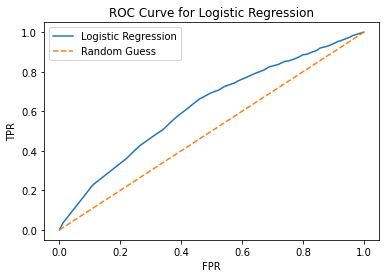

In [23]:
#plot the ROC curve
fpr, tpr, thresh = metrics.roc_curve(y_test, predictions[:,1])
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr,tpr,"-")
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression','Random Guess'])

In [24]:
#calculate the data for the precision-recall curve on the testing data using scikit-learn
precision,recall,thresh=metrics.precision_recall_curve(y_test,predictions[:,1])

Text(0.5, 1.0, 'Precision - Recall Curve')

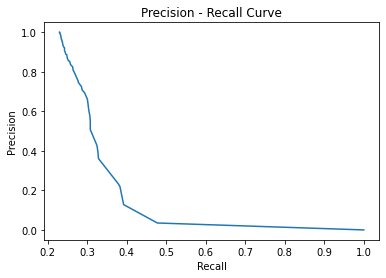

In [25]:
#plot the precision-recall curve
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')

In [26]:
#calculate the area under the curve
metrics.auc(recall,precision)

0.3350167815213556

In [27]:
#calculate the ROC AUC for training data
training_preds=model.predict_proba(x_train)
training_preds

array([[0.53445691, 0.46554309],
       [0.75107834, 0.24892166],
       [0.90103193, 0.09896807],
       ...,
       [0.58543276, 0.41456724],
       [0.95714143, 0.04285857],
       [0.63464258, 0.36535742]])

In [28]:
metrics.roc_auc_score(y_train,training_preds[:,1])

0.6177228831509552